In [4]:
import pandas as pd
import os

file_path = 'C:\\Users\\natan\\Downloads\\dataset2001_2024.csv'
if os.path.exists(file_path):
    df = pd.read_csv(file_path)
else:
    print(f'O arquivo {file_path} não foi encontrado.')

In [5]:
# Split dos dados para o ultimo ano
df_23 = df[df['YEAR'] == 2023]
df_23

,YEAR,MO,DY,HR,ALLSKY_SFC_UV_INDEX,ALLSKY_SRF_ALB,CLRSKY_KT,CLOUD_AMT,T2M,PS,PW,WD10M,WD50M,WS50M,WS10M,TOA_SW_DNI,QV2M,QV10M
192840,2023,1,1,0,0.00,-999.00,-999.00,24.35,20.53,93.57,3.14,131.22,130.84,4.80,2.26,0.00,15.50,15.44
192841,2023,1,1,1,0.00,-999.00,-999.00,10.65,19.88,93.55,3.11,128.08,127.81,4.59,2.15,0.00,15.14,15.08
192842,2023,1,1,2,0.00,-999.00,-999.00,2.78,19.30,93.50,3.05,126.69,126.37,4.27,2.03,0.00,14.71,14.71
192843,2023,1,1,3,0.00,-999.00,-999.00,16.53,18.81,93.45,3.03,122.78,122.15,3.95,1.90,0.00,14.40,14.40
192844,2023,1,1,4,0.00,-999.00,-999.00,19.04,18.47,93.41,2.99,115.78,115.21,3.70,1.80,0.00,14.16,14.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201595,2023,12,31,19,2.92,0.15,0.67,31.79,28.00,93.33,2.72,155.45,154.80,6.44,5.66,1408.66,11.47,11.29
201596,2023,12,31,20,0.80,0.13,0.58,20.45,25.87,93.38,2.70,152.49,152.07,7.36,6.12,1408.61,11.72,11.66
201597,2023,12,31,21,0.05,0.16,0.38,31.40,23.62,93.45,2.70,148.69,148.45,7.88,6.21,1408.76,12.08,12.02
201598,2023,12,31,22,0.00,-999.00,-999.00,21.06,21.87,93.52,2.71,145.60,145.61,7.41,5.61,0.00,12.45,12.39


In [53]:
# Criando nova coluna para datas

df_23['timeConcat'] = df_23.apply(lambda row: f"{row['YEAR']}{row['MO']}{row['DY']}{row['HR']}", axis=1)
df_23['timeConcat'] = df_23['timeConcat'].astype(str).str.pad(10, fillchar='0')
df_23['timestamp'] = pd.to_datetime(df_23['timeConcat'], format='%Y%m%d%H')

C:\Users\Natan Guedes\AppData\Local\Temp\ipykernel_20544\2388561281.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_23['timeConcat'] = df_23.apply(lambda row: f"{row['YEAR']}{row['MO']}{row['DY']}{row['HR']}", axis=1)
C:\Users\Natan Guedes\AppData\Local\Temp\ipykernel_20544\2388561281.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_23['timeConcat'] = df_23['timeConcat'].astype(str).str.pad(10, fillchar='0')


ValueError: day is out of range for month, at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

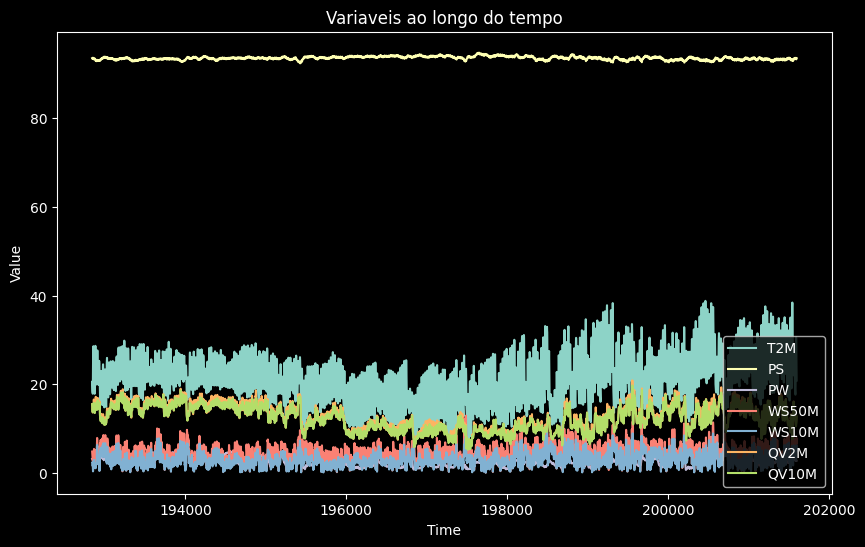

In [38]:
import matplotlib.pyplot as plt

colunas_plotar = [
    'YEAR',
    'MO',
    'DY',
    'HR',
    "ALLSKY_SFC_UV_INDEX",
    'ALLSKY_SRF_ALB',
    'CLRSKY_KT',
    'CLOUD_AMT',
    'T2M',
    'PS',
    'PW',
    'WD10M',
    'WD50M',
    'WS50M',
    'WS10M',
    'TOA_SW_DNI',
    'QV2M',
    'QV10M',
    
]

plt.figure(figsize=(10, 6))
#plt.plot(df_23['ALLSKY_SFC_UV_INDEX'], label='ALLSKY_SFC_UV_INDEX')
#plt.plot(df_23['ALLSKY_SRF_ALB'], label='ALLSKY_SRF_ALB')
#plt.plot(df_23['CLRSKY_KT'], label='CLRSKY_KT')
#plt.plot(df_23['CLOUD_AMT'], label='CLOUD_AMT')
plt.plot(df_23['T2M'], label='T2M')
plt.plot(df_23['PS'], label='PS')
plt.plot(df_23['PW'], label='PW')
#plt.plot(df_23['WD10M'], label='WD10M')
#plt.plot(df_23['WD50M'], label='WD50M')
plt.plot(df_23['WS50M'], label='WS50M')
plt.plot(df_23['WS10M'], label='WS10M')
#plt.plot(df_23['TOA_SW_DNI'], label='TOA_SW_DNI')
plt.plot(df_23['QV2M'], label='QV2M')
plt.plot(df_23['QV10M'], label='QV10M')


plt.title('Variaveis ao longo do tempo')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend(loc='lower right')
plt.show()

In [ ]:
colunas_plotar = [
    'YEAR',
    'MO',
    'DY',
    'HR',
    "ALLSKY_SFC_UV_INDEX",
    'ALLSKY_SRF_ALB',
    'CLRSKY_KT',
    'CLOUD_AMT',
    'T2M',
    'PS',
    'PW',
    'WD10M',
    'WD50M',
    'WS50M',
    'WS10M',
    'TOA_SW_DNI',
    'QV2M',
    'QV10M',
    
]

for column in colunas_plotar:
    plt.plot(df_23.index)

In [39]:
df_23.index

Index([192840, 192841, 192842, 192843, 192844, 192845, 192846, 192847, 192848,
       192849,
       ...
       201590, 201591, 201592, 201593, 201594, 201595, 201596, 201597, 201598,
       201599],
      dtype='int64', length=8760)